<font color='green' size = 5>Homework #2 - ECEN 4005 - Sanjay Kumar Keshava</font>



In [1]:
# import packages and modules
import numpy as np
import qutip as qt
from qutip.qip.operations import x_gate, y_gate, z_gate, s_gate, t_gate, snot, rx, ry, rz, swap ,iswap, swapalpha,cnot, cz_gate, globalphase
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math

In [2]:
# define qubit states
psi0 = qt.basis(2,0)
psi1 = qt.basis(2,1)
plus = (psi0 + psi1).unit()
minus = (psi0 - psi1).unit()

# define operators 
sx = qt.sigmax()
sy = qt.sigmay()
sz = qt.sigmaz()
si = qt.qeye(2)

# define quantities to evaluate
M0 = psi0*psi0.dag() # |0><0| measurement operator
M1 = psi1*psi1.dag() # |1><1| measurement operator
M_plus = plus*plus.dag() # |+><+| measurement operator
M_minus = minus*minus.dag() # |-><-| measurement operator

psi00 = qt.basis(4,0)
psi01 = qt.basis(4,1)
psi10 = qt.basis(4,2)
psi11 = qt.basis(4,3)




<font color='green' size = 5>Problems 1(e) and (f) - Werner State Purity and Concurrence</font>

<IPython.core.display.Javascript object>


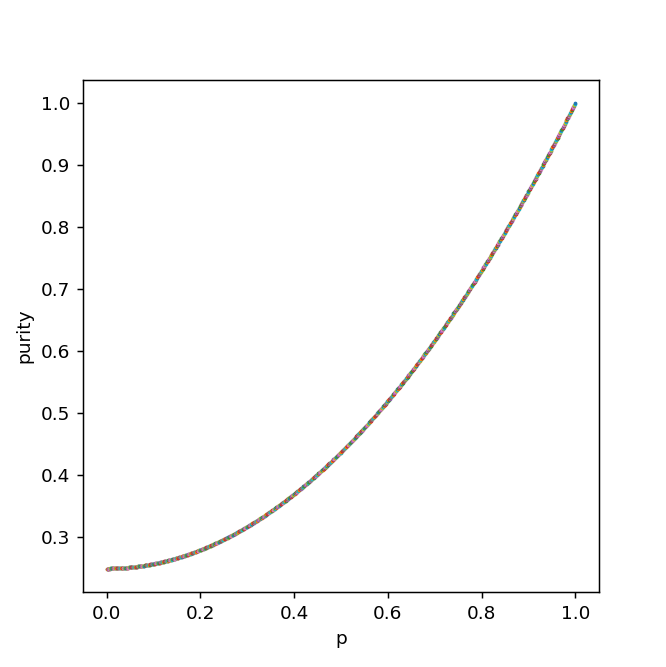

<IPython.core.display.Javascript object>


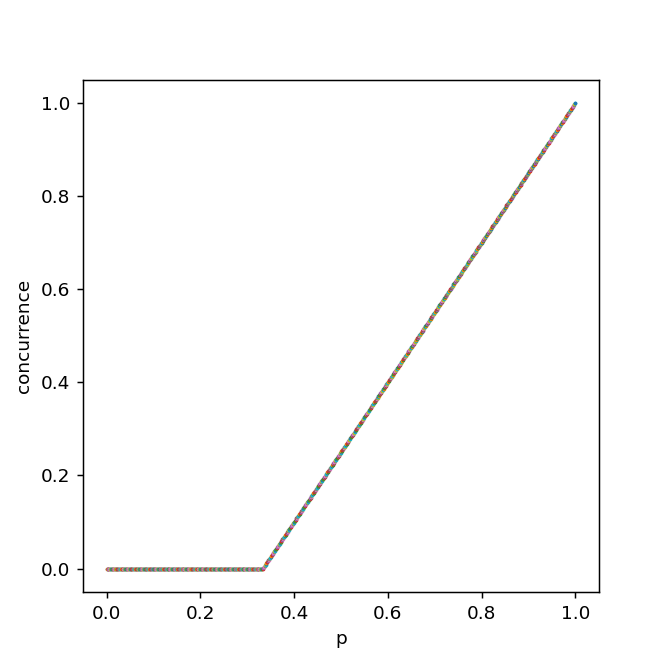

In [3]:
rho1 = qt.ket2dm(qt.bell_state('11'));
rho2 = qt.tensor(qt.qeye(2),qt.qeye(2))
def werner(p):
    rho_w = p*(rho1) + ((1-p)/4)*rho2
    return rho_w

start = 0;
stop = 1;
step = 0.001
num = int((stop/step) + 1)
p = np.arange(start,stop+step,step)


purity = np.zeros(num)
figz, axsz = plt.subplots(figsize=(5, 5))
for j in p:
    i = 0;
    purity[i] = np.real(np.trace((werner(j)*werner(j))))
    plt.plot(j, purity[i], '-o', markersize= 1, linewidth=0.5)
    i=i+1;
plt.xlabel('p')
plt.ylabel('purity')
plt.show()


conc = np.zeros(num)
figx, axsx = plt.subplots(figsize=(5, 5))
for j in p:
    i = 0;
    conc[i] = qt.concurrence(werner(j))
    plt.plot(j, conc[i], '-o', markersize= 1, linewidth=0.5)
    i=i+1;
plt.xlabel('p')
plt.ylabel('concurrence')
plt.show()


<font color='green' size = 5> Problem 3(a) - Rabi Hamiltonian Time Evolution </font>

In [4]:
# the Hamiltonian in function form
def H_Rabi(t):
    H_op =  0.5*sy
    return [H_op, np.ones(len(t))] 

# define time axis
t_list = np.arange(0, 6.29, 0.001)

# start the evolution in the |0> state
initial_state = psi0 

# solve numerically the Rabi Hamiltonian
resultforexpectations = qt.mesolve(H_Rabi(t_list), initial_state, t_list, e_ops=[M_plus, M_minus])
resultforstatevectors = qt.mesolve(H_Rabi(t_list), initial_state, t_list)

# calculate the expectation values of the measurement operators
expectations = np.array(resultforexpectations.expect)
statevectors = np.array(resultforstatevectors.states)

p0 = expectations[0]
p1 = expectations[1]

<IPython.core.display.Javascript object>


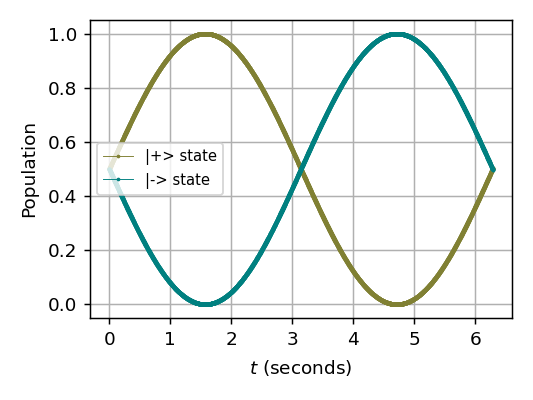

In [5]:
fig1, axs1 = plt.subplots(figsize=(4, 3))

axs1.plot(t_list, p0, '-o', markersize= 1, linewidth=0.5,
            color=[0.5,0.5,0.2], label = r'|+> state')

axs1.plot(t_list, p1, '-o', markersize= 1, linewidth=0.5,
            color=[0.0,0.5,0.5], label = r'|-> state')

axs1.set_xlabel(r"$t$ (seconds)", labelpad=5)
axs1.set_ylabel("Population", labelpad=5)
axs1.legend(loc='best', fontsize = 8)
axs1.grid()

plt.tight_layout()
plt.show()

In [6]:
plustime = t_list[np.argmax(p0)]
fidplus = p0[np.argmax(p0)]*100
print('Time for evolution to |+> state: ' + str(plustime)+ ' seconds')
print('Assuming clock resolution of 0.001 seconds, Fidelity for |+> state: ' + str(fidplus)+ '%')
print('')
print('Final state: ')
print(statevectors[np.argmax(p0)])
print('')
print('Expected state: ')
print(plus)

print('')

minustime = t_list[np.argmax(p1)]
fidminus = p1[np.argmax(p1)]*100
print('Time for evolution to |-> state: ' + str(minustime) + ' seconds')
print('Assuming clock resolution of 0.001 seconds, Fidelity for |-> state: ' + str(fidminus) + '%')
print('')
print('Final state: ')
print(statevectors[np.argmax(p1)])
print('')
print('Expected state: ')
print(minus)

Time for evolution to |+> state: 1.571 seconds
Assuming clock resolution of 0.001 seconds, Fidelity for |+> state: 99.99999896485%

Final state: 
[[0.70703483+0.j]
 [0.70717872+0.j]]

Expected state: 
Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.70710678]
 [0.70710678]]

Time for evolution to |-> state: 4.712 seconds
Assuming clock resolution of 0.001 seconds, Fidelity for |-> state: 99.99999620556379%

Final state: 
[[-0.70696903+0.j]
 [ 0.70724451+0.j]]

Expected state: 
Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[ 0.70710678]
 [-0.70710678]]



<font color='green' size = 5>Problem 3(b) - XX Interaction Hamiltonian Time Evolution</font>

In [7]:
# XX Hamiltonian
H_XX =  (3/2)*(qt.tensor(sx,sx) + qt.tensor(sy,sy))

# define time axis
t_vec = np.arange(0, 6.8, 0.001)

# start the evolution in the |+-> state
in_state = qt.tensor(plus,minus)

# solve and get states
result = qt.mesolve(H_XX, in_state, t_vec)
sv = np.array(result.states)

# calculate expected final state by finding iSWAP|+->
iSWAP_entangled = iswap()*in_state

# project onto expected final state and find expectation
expect_iSWAP_entangled = np.ones(len(t_vec))
for i in range(0,len(t_vec),1):
    expect_iSWAP_entangled[i] = (np.absolute(iSWAP_entangled.dag()*sv[i]))**2


<IPython.core.display.Javascript object>


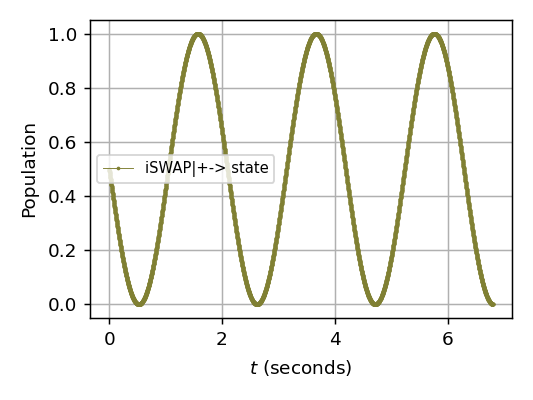

In [8]:
fig2, axs2 = plt.subplots(figsize=(4, 3))

axs2.plot(t_vec, expect_iSWAP_entangled, '-o', markersize= 1, linewidth=0.5,
            color=[0.5,0.5,0.2], label = r'iSWAP|+-> state')

# axs.plot(t_list, p1, '-o', markersize= 1, linewidth=0.5,
#             color=[0.0,0.5,0.5], label = r'- state')

axs2.set_xlabel(r"$t$ (seconds)", labelpad=5)
axs2.set_ylabel("Population", labelpad=5)
axs2.legend(loc='best', fontsize = 8)
axs2.grid()

plt.tight_layout()
plt.show()

In [9]:
timetaken = t_vec[np.argmax(expect_iSWAP_entangled)]
fid = expect_iSWAP_entangled[np.argmax(expect_iSWAP_entangled)]*100
print('Time for evolution to iSWAP|+-> state: ' + str(timetaken)+ ' seconds')
print('Assuming clock resolution of 0.001 seconds, Fidelity for iSWAP|+-> state: ' + str(fid)+ '%')
print('')
print('Final state: ')
fin = sv[np.argmax(expect_iSWAP_entangled)];
conc = (2*np.absolute((fin[0]*fin[3] - fin[1]*fin[2])))[0];
print(fin)
print('')
print('Concurrence: ')
print(conc)
print('')
print('Expected state: ')
print(iSWAP_entangled)
print('')
print('Expected concurrence: ')
print(qt.concurrence(iSWAP_entangled))
print('')

Time for evolution to iSWAP|+-> state: 1.571 seconds
Assuming clock resolution of 0.001 seconds, Fidelity for iSWAP|+-> state: 99.99998716952484%

Final state: 
[[ 5.00094148e-01+0.j        ]
 [-3.04643280e-04+0.49990574j]
 [ 3.04643280e-04-0.49990574j]
 [-5.00094148e-01+0.j        ]]

Concurrence: 
0.9999998143150192

Expected state: 
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.5+0.j ]
 [ 0. +0.5j]
 [ 0. -0.5j]
 [-0.5+0.j ]]

Expected concurrence: 
0.9999999864330515

